In [0]:
import numpy as np

# return matrix A and b
# 1. divide by a_k 
# 2. express y^(k) derivative 
# 3. create matrix and replace the last row with reverse coefficients
def convert_ODE_to_SS(coefs, b0):
  b0 /= coefs[0]
  coefs = coefs / coefs[0]
  A = np.eye(len(coefs), k=1)
  A[-1] = coefs[::-1]
  B = np.zeros((3, 1))
  B[-1][0] = b0
  return A, B
  

In [43]:
coef = np.array([3, 2, 1])
convert_ODE_to_SS(coef, 3)

(array([[0.        , 1.        , 0.        ],
        [0.        , 0.        , 1.        ],
        [0.33333333, 0.66666667, 1.        ]]), array([[0.        ],
        [0.        ],
        [0.33333333]]))

In [0]:
def pend(y, t, coefs, u):
  '''
  y: np array of shape (N) in order x(0), x'(0), x''(0) ...
  t: range
  coefs: np array of shape (N) in order a1*x, a2*x', a3*x'' ...
  u: function of t
  '''
  dydt = np.append(y[1:], coefs.dot(y) + u(t)) 
  return dydt


In [0]:
from scipy.integrate import odeint
from math import sin

coefs = np.array([-5, 1])
y0 = np.array([-5, 0])
u = lambda t: -3 * sin(t)
t = np.linspace(0, 10, 101)
sol = odeint(pend, y0, t, args=(coefs, u))

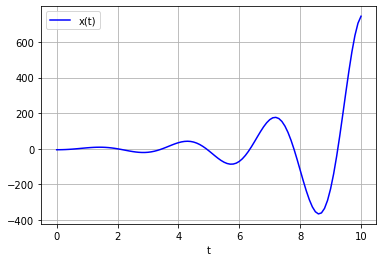

In [80]:
import matplotlib.pyplot as plt

plt.plot(t, sol[:, 0], 'b', label='x(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()